In [64]:
import numpy as np
import pandas as pd
import nltk
from collections import Counter 
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
import matplotlib.pyplot as plt
from zipfile import ZipFile 
from sklearn.feature_selection import chi2
from sklearn.feature_selection import SelectKBest, chi2
import pickle

In [65]:
corpus = pd.read_csv("C:/Users/User/Downloads/TA/traindata.csv")
corpus.head()

,review,label
0,starter lah gituu,0
1,motor matic xeon karbu kemarin mati gak starte...,0
2,ya klw saring filter karbu tenaga klw pake sar...,1
3,sy honda matic vario esp habis oli mesin karna...,1
4,baik mesin,1


In [66]:
corpus_test = pd.read_csv("C:/Users/User/Downloads/TA/testdata.csv")
corpus_test.head()

,review,label
0,motor mio sporty ane setang getar sebab ya,0
1,maaf gan mesin motor honda beat fi,1
2,kalo kabel spul mio soul yg api warna om,0
3,motor karisma lampu papan monitor tanda sen la...,0
4,speedo meter mati indikator bensin ganti,0


In [67]:
corpus_all = pd.concat([corpus, corpus_test], axis=0)

In [68]:
corpus_all.shape

(505, 2)

In [69]:
corpus_mesin= corpus_all[corpus_all.label==1]

In [70]:
corpus_nonmesin= corpus_all[corpus_all.label==0]

In [71]:
tmp= corpus_mesin.review.str.cat(sep=' ')
words = nltk.tokenize.word_tokenize(tmp)
word_dist = nltk.FreqDist(words)
rslt = pd.DataFrame(word_dist.most_common(50),
                    columns=['Word', 'Frequency'])
print (rslt)

       Word  Frequency
0     motor        188
1        ya        108
2     mesin         89
3       nya         85
4       gas         58
5      mati         57
6     bunyi         52
7      kalo         51
8     ganti         48
9     nyala         43
10       yg         41
11    suara         39
12      mio         36
13   kadang         32
14    hidup         29
15      ane         26
16      klo         25
17    jalan         24
18     gigi         23
19      gak         23
20   normal         23
21     udah         23
22       ga         22
23        d         22
24      gan         22
25       gk         22
26     bang         22
27      oli         21
28     beat         21
29      bos         20
30      tek         20
31      pas         20
32      tpi         19
33    tarik         19
34    sebab         19
35      api         18
36       sy         17
37    honda         17
38  injeksi         17
39    nanya         17
40  kopling         17
41    karbu         16
42    supra

Text(0.5, 1.0, 'Top 50 tokens in mesin sepeda motor reviews')

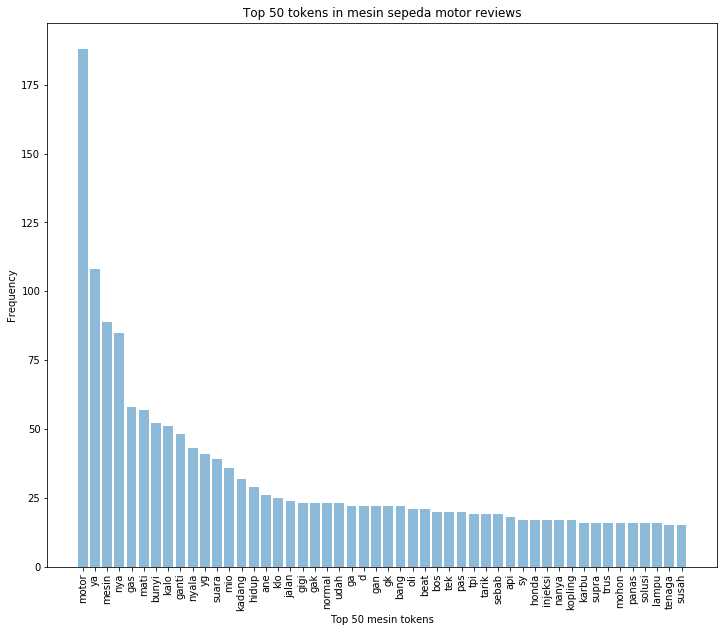

In [72]:
plt.figure(figsize=(12,10))
plt.bar(rslt.Word, rslt.Frequency, align='center', alpha=0.5)
plt.xticks(rotation='vertical')
plt.ylabel('Frequency')
plt.xlabel('Top 50 mesin tokens')
plt.title('Top 50 tokens in mesin sepeda motor reviews')

In [73]:
tmp= corpus_nonmesin.review.str.cat(sep=' ')
words = nltk.tokenize.word_tokenize(tmp)
word_dist = nltk.FreqDist(words)
rslt = pd.DataFrame(word_dist.most_common(50),
                    columns=['Word', 'Frequency'])
print (rslt)

         Word  Frequency
0       motor        135
1          ya         75
2         nya         38
3       lampu         38
4         aki         35
5         rem         35
6        mati         32
7         ban         27
8         gak         21
9          yg         21
10       mana         21
11      bagus         21
12       kalo         20
13      matic         19
14    starter         17
15     gimana         17
16      ganti         15
17      jalan         15
18         ga         15
19      sebab         15
20        ane         14
21      nyala         14
22        gan         14
23      pakai         12
24       velg         11
25  indikator         11
26      hidup         11
27     kontak         10
28        klo         10
29       jari         10
30       suka         10
31     pasang         10
32      stang         10
33      karbu          9
34    listrik          9
35     stater          9
36       koil          8
37      kedap          8
38      kedip          8


Text(0.5, 1.0, 'Top 50 tokens in non mesin sepeda motor reviews')

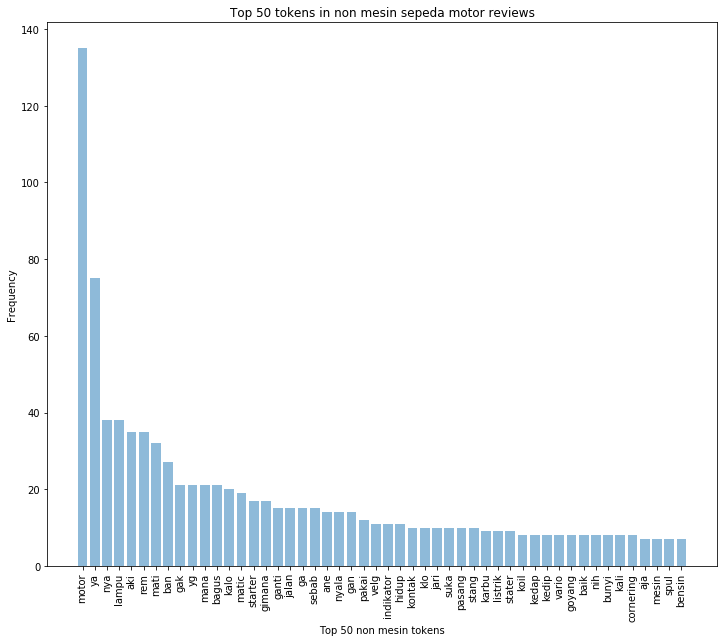

In [74]:
plt.figure(figsize=(12,10))
plt.bar(rslt.Word, rslt.Frequency, align='center', alpha=0.5)
plt.xticks(rotation='vertical')
plt.ylabel('Frequency')
plt.xlabel('Top 50 non mesin tokens')
plt.title('Top 50 tokens in non mesin sepeda motor reviews')

In [75]:
vectorizer = CountVectorizer(ngram_range=(1,1)).fit(corpus['review'])
#print (X.vocabulary_)
#print(vectorizer.get_feature_names())
X = vectorizer.transform(corpus['review'])
print (X.toarray())

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 2 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


In [76]:
X_test = vectorizer.transform(corpus_test['review'])
print (X_test.toarray())

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 1 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


In [77]:
tfidf_transformer=TfidfTransformer(smooth_idf=True,use_idf=True).fit(X)
X = tfidf_transformer.transform(X)
print (X.toarray())

[[0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.         0.         ... 0.10576363 0.         0.        ]
 [0.         0.         0.         ... 0.         0.         0.        ]
 ...
 [0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.         0.         ... 0.         0.         0.        ]]


In [78]:
X_test = tfidf_transformer.transform(X_test)
print (X_test.toarray())

[[0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.         0.         ... 0.23303247 0.         0.        ]
 ...
 [0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.         0.         ... 0.         0.         0.        ]]


In [16]:
# print idf values
##df_idf = pd.DataFrame(tfidf_transformer.idf_, index=vectorizer.get_feature_names(),columns=["idf_weights"])
 
# sort ascending
#df_idf.sort_values(by=['idf_weights'])

In [79]:
X_test.shape

(101, 981)

In [80]:
y= corpus['label'].values
print(y)

[0 0 1 1 1 1 0 0 1 0 0 1 1 1 1 1 1 0 0 1 0 0 1 1 0 0 0 1 1 1 0 1 1 0 1 1 0
 1 0 1 0 0 0 0 1 1 0 1 1 0 1 1 1 0 1 1 0 1 1 0 0 0 0 1 0 1 1 1 0 1 0 1 1 1
 0 0 0 0 0 0 0 1 1 0 1 1 0 1 1 1 1 0 0 0 1 1 0 1 0 1 0 0 1 0 0 1 1 1 1 1 1
 1 1 1 1 0 1 1 1 0 0 1 1 0 0 1 0 1 0 1 0 0 1 1 0 1 1 1 1 1 1 1 1 0 0 1 1 1
 0 1 1 0 0 0 0 0 1 0 0 0 1 0 0 1 0 1 1 1 1 0 1 1 1 1 1 1 0 0 0 0 1 0 0 0 1
 0 1 1 1 0 0 0 0 1 0 1 0 0 1 0 1 1 1 1 0 0 0 0 1 0 1 0 1 1 0 1 0 0 1 0 1 1
 1 0 0 1 0 1 1 0 0 1 1 1 1 1 0 0 0 0 0 1 0 1 1 1 0 1 0 0 0 0 0 1 1 0 0 0 0
 0 1 1 0 1 0 0 0 0 0 1 1 1 0 1 1 1 1 0 0 1 0 0 0 0 1 1 1 1 1 0 0 1 0 1 1 0
 1 1 1 0 0 1 0 1 1 1 0 0 1 0 1 1 0 0 1 1 1 0 0 1 0 0 0 1 1 0 1 0 1 1 1 1 0
 1 0 0 1 0 0 0 1 0 0 0 0 1 1 0 0 0 1 1 1 1 1 0 1 0 1 1 1 0 0 0 1 0 1 1 0 0
 0 0 1 0 0 0 1 1 0 1 1 1 1 1 0 1 1 0 0 0 1 0 0 0 1 0 1 1 1 1 1 0 1 0]


In [81]:
y_test= corpus_test['label'].values
print(y_test)

[0 1 0 0 0 0 1 0 1 1 1 1 0 1 0 1 0 0 1 0 1 0 1 1 1 1 1 0 1 0 0 1 0 1 0 0 0
 1 1 1 1 0 0 1 1 0 0 0 1 0 1 0 1 0 0 1 0 1 1 0 1 1 1 1 1 0 1 0 1 1 0 1 0 1
 1 0 1 1 0 0 1 1 1 1 0 0 1 1 0 0 1 0 1 0 0 0 0 0 1 1 0]


In [82]:
filename = 'uxy.p'
outfile = open(filename,'wb')
pickle.dump([X,y],outfile)
outfile.close()

In [83]:
filename = 'uxy_test.p'
outfile = open(filename,'wb')
pickle.dump([X_test,y_test],outfile)
outfile.close()

Text(0.5, 0, '$\\chi^2$')

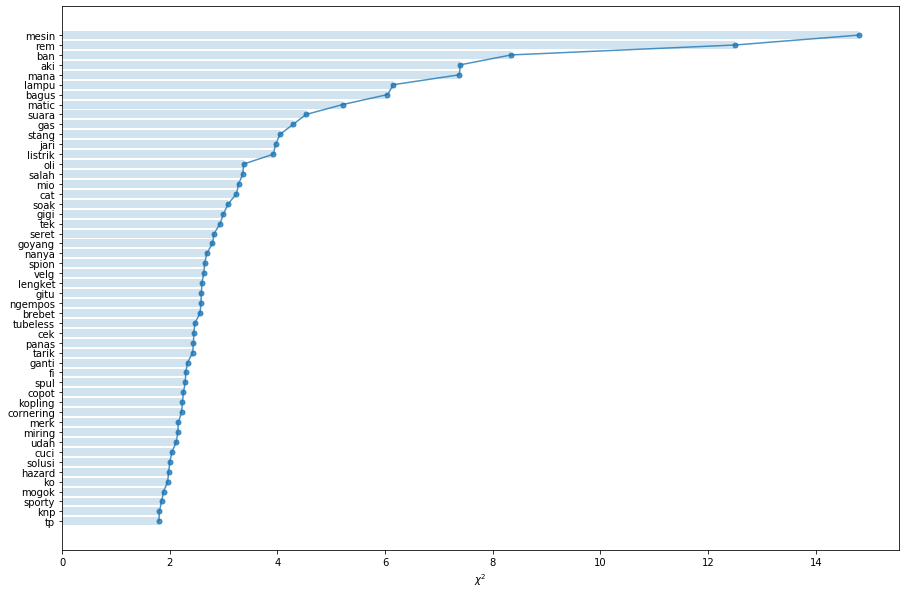

In [84]:
chi2score = chi2(X, y)[0]

plt.figure(figsize=(15,10))
wscores = list (zip(vectorizer.get_feature_names(), chi2score))
wchi2 = sorted(wscores, key=lambda x:x[1])
topchi2 = list (zip(*wchi2[-50:]))
x = range(len(topchi2[1]))
labels = topchi2[0]
plt.barh(x,topchi2[1], align='center', alpha=0.2)
plt.plot(topchi2[1], x, '-o', markersize=5, alpha=0.8)
plt.yticks(x, labels)
plt.xlabel('$\chi^2$')